<center> <h1> Classification Practical by Edureka </h1> </center>

In [1]:
!pip install pandas numpy matplotlib scikit-learn seaborn

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
data= pd.read_csv(url, sep= ";")
print(data.shape)
data.head(2)

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [10]:
data['quality_label']= data['quality'].apply(lambda x: 'high' if x >= 6 else 'low')
data.drop('quality', axis=1, inplace=True)
print(data.shape)
data.head(2)

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,high
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,high


In [11]:
from sklearn.model_selection import train_test_split

X= data.drop('quality_label', axis=1)
y= data['quality_label']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3918, 11) (980, 11) (3918,) (980,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Accuracy :  0.84



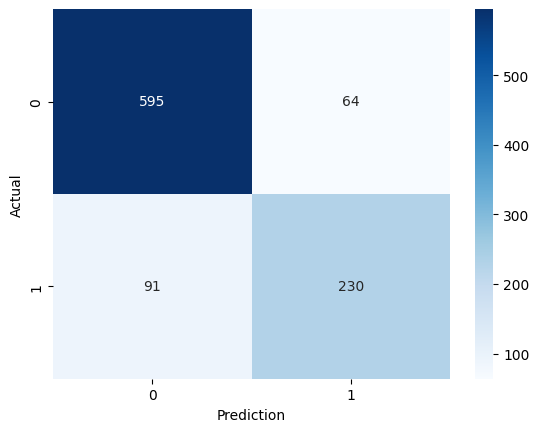

              precision    recall  f1-score   support

        high       0.87      0.90      0.88       659
         low       0.78      0.72      0.75       321

    accuracy                           0.84       980
   macro avg       0.82      0.81      0.82       980
weighted avg       0.84      0.84      0.84       980



In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediction
y_pred= model.predict(X_test_scaled)

# Accuracy
print(f"Accuracy : {accuracy_score(y_test, y_pred) : 0.2f}")
print()

# Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt= 'd', cmap= "Blues")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


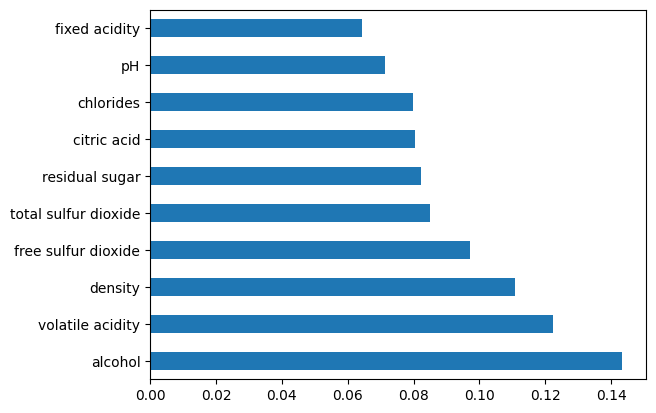

In [17]:
feature_importance= pd.Series(model.feature_importances_, index= X.columns)
feature_importance.nlargest(10).plot(kind= 'barh')
plt.show()

<center> <h1> Regression Practical by Edureka </h1> </center>

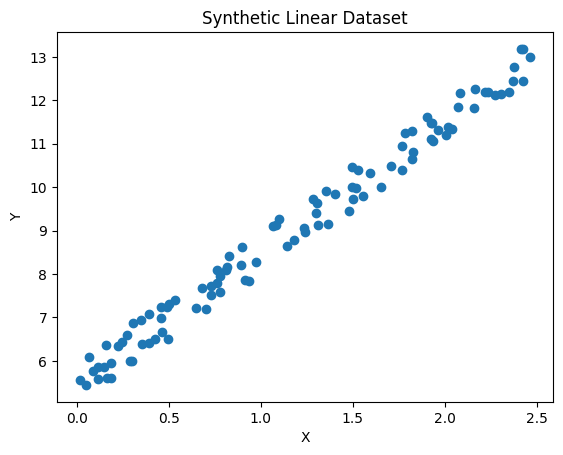

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42) # Ensuring Reproducibility

# Generate Synthetic Data
X= 2.5 * np.random.rand(100, 1) # Input Variable
y= 5 + 3 * X.squeeze() + np.random.rand(100) # Target variable with noise

# Visualizing the Data
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Synthetic Linear Dataset")
plt.show()

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80,) (20,)


In [21]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [22]:
print(f"Coeffient : {model.coef_[0]}")
print(f"Intercept : {model.intercept_}")

Coeffient : 2.976556925921669
Intercept : 5.531944512065735


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred= model.predict(X_test)

mse= mean_squared_error(y_test, y_pred)

r2= r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse}")
print(f"R^2 Score : {r2}")

Mean Squared Error : 0.09544303469758972
R^2 Score : 0.9833388499973384


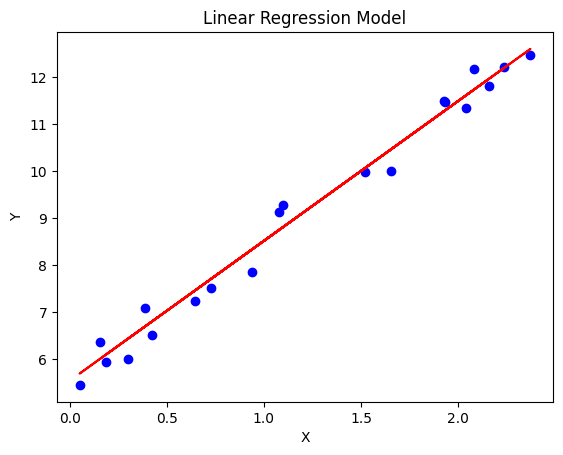

In [24]:
# Visualizing the Results
plt.scatter(X_test, y_test, color="blue", label= "Actual Data")
plt.plot(X_test, y_pred, color="red", label= "TRegression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Model")
plt.show()